In [22]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [35]:
class ANN:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)

    def initialize_parameters(self):
        np.random.seed(1)

        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))

    def forward(self, X):
        store = {}

        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z

        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z

        return A, store

    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)

    def backward(self, X, Y, store):

        derivatives = {}

        store["A0"] = X.T

        A = store["A" + str(self.L)]
        dZ = A - Y.T

        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)

        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db

        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)

            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db

        return derivatives

    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)

        self.n = X.shape[0]

        self.layers_size.insert(0, X.shape[1])

        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T))
            derivatives = self.backward(X, Y, store)

            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]

            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))

            if loop % 10 == 0:
                self.costs.append(cost)

    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100

    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

In [36]:
iris = load_iris()
X, y = iris.data, iris.target

train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                        train_size=0.5,
                                                        test_size=0.5,
                                                        random_state=123)

In [37]:
enc = OneHotEncoder(sparse=False, categories='auto')
train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
test_y = enc.transform(test_y.reshape(len(test_y), -1))

train_x's shape: (75, 4)
test_x's shape: (75, 4)
Cost:  0.37797638900969094 Train Accuracy: 48.0
Cost:  0.1524563750575942 Train Accuracy: 92.0
Cost:  0.1091406908036644 Train Accuracy: 94.66666666666667
Cost:  0.08261344818675323 Train Accuracy: 97.33333333333334
Cost:  0.06559543193936519 Train Accuracy: 97.33333333333334
Cost:  0.054518791462554485 Train Accuracy: 97.33333333333334
Cost:  0.04701406680314554 Train Accuracy: 97.33333333333334
Cost:  0.04169950868733145 Train Accuracy: 98.66666666666667
Cost:  0.03778683982295048 Train Accuracy: 98.66666666666667
Cost:  0.0348097291342907 Train Accuracy: 98.66666666666667
Train Accuracy: 98.66666666666667
Test Accuracy: 97.33333333333334


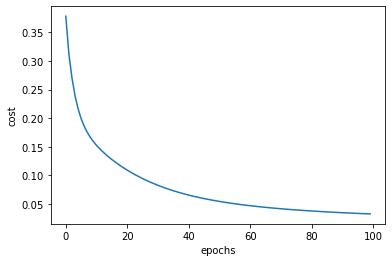

In [38]:
if __name__ == '__main__':

    print("train_x's shape: " + str(train_x.shape))
    print("test_x's shape: " + str(test_x.shape))

    layers_dims = [50, 3]

    ann = ANN(layers_dims)
    ann.fit(train_x, train_y, learning_rate=0.1, n_iterations=1000)
    print("Train Accuracy:", ann.predict(train_x, train_y))
    print("Test Accuracy:", ann.predict(test_x, test_y))
    ann.plot_cost()

# GLASS DATA - Library Implementation

In [ ]:
### Import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf

In [ ]:
X_train = np.loadtxt('df_train.csv',delimiter=',', skiprows=1, usecols = range(0,9))
y_train_pre = np.loadtxt('df_train.csv',delimiter=',', skiprows=1, usecols = 9)

X_test = np.loadtxt('df_test.csv',delimiter=',', skiprows=1, usecols = range(0,9))
y_test_pre = np.loadtxt('df_test.csv',delimiter=',', skiprows=1, usecols = 9)


enc = OneHotEncoder(sparse=False, categories='auto')
y_train = enc.fit_transform(y_train_pre.reshape(len(y_train_pre), -1))
y_test = enc.transform(y_test_pre.reshape(len(y_test_pre), -1))

### Validating the shapes
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

In [ ]:
### Constructing the model, using sigmoid on our hidden layers and softmax on output layer
model = keras.models.Sequential([
    keras.layers.Dense(4, input_shape= (9,), activation="sigmoid", name='L1_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L2_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L3_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L4_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L5_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L6_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L7_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L8_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L9_Sigmoid'),
    keras.layers.Dense(4, activation="sigmoid", name = 'L10_Sigmoid'),
    keras.layers.Dense(6, activation="softmax", name = 'L3_Output')
])

### Using SGD optimizer & learning rate
optimizer = tf.keras.optimizers.SGD(0.001)

### Complie layers, set loss function, previously defined optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

### Train model, observe performance on val set
history = model.fit(X_train, y_train, verbose = 2, epochs=100000)

In [ ]:
### Plot performance 
pd.DataFrame(history.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 3) 
plt.show()

In [ ]:
print('Neural Network Model Summary: ')
print(model.summary())

In [ ]:
### Test out model on unseen data
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

# Our own implementation

In [40]:
x_test = np.loadtxt('df_test.csv',delimiter=',', skiprows=1, usecols = range(0,9))
x_train = np.loadtxt('df_train.csv',delimiter=',', skiprows=1, usecols = range(0,9))

y_test = np.loadtxt('df_test.csv',delimiter=',', skiprows=1, usecols = 9)
y_train = np.loadtxt('df_train.csv',delimiter=',', skiprows=1, usecols = 9)

In [45]:
x_test.shape

(65, 9)

In [46]:
x_train.shape

(149, 9)

In [48]:
y_test.shape

(65,)

In [49]:
y_train.shape

(149,)

train_x's shape: (149, 9)
test_x's shape: (65, 9)
Cost:  0.3143817339811881 Train Accuracy: 35.57046979865772
Cost:  0.25078772956101797 Train Accuracy: 35.57046979865772
Cost:  0.250787729544847 Train Accuracy: 35.57046979865772
Cost:  0.2507877295448294 Train Accuracy: 35.57046979865772
Cost:  0.2507877295448119 Train Accuracy: 35.57046979865772
Cost:  0.2507877295447942 Train Accuracy: 35.57046979865772
Cost:  0.2507877295447766 Train Accuracy: 35.57046979865772
Cost:  0.250787729544759 Train Accuracy: 35.57046979865772
Cost:  0.2507877295447413 Train Accuracy: 35.57046979865772
Cost:  0.2507877295447237 Train Accuracy: 35.57046979865772
Cost:  0.2507877295447061 Train Accuracy: 35.57046979865772
Cost:  0.2507877295446884 Train Accuracy: 35.57046979865772
Cost:  0.25078772954467077 Train Accuracy: 35.57046979865772
Cost:  0.2507877295446531 Train Accuracy: 35.57046979865772
Cost:  0.2507877295446354 Train Accuracy: 35.57046979865772
Cost:  0.25078772954461775 Train Accuracy: 35.5704

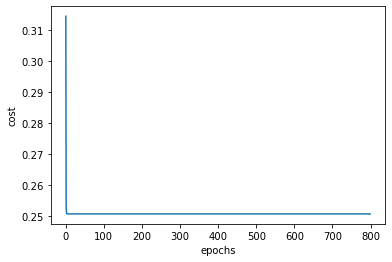

In [66]:
if __name__ == '__main__':

    print("train_x's shape: " + str(x_train.shape))
    print("test_x's shape: " + str(x_test.shape))

    layers_dims = [1, 6]

    ann = ANN(layers_dims)
    ann.fit(x_train, train_y, learning_rate=1, n_iterations=8000)
    print("Train Accuracy:", ann.predict(x_train, train_y))
    print("Test Accuracy:", ann.predict(x_test, test_y))
    ann.plot_cost()